In [1]:
import numpy as np
import pandas as pd
from ff_espn_api import League

In [2]:
league_id = 800692

years = np.arange(2013, 2023)
swid = '{942EBCE8-AC64-4CB7-AEBC-E8AC646CB761}'
espn_s2 = 'AEC8F6kHuL%2FkUBUsx5spyfT5%2B6YBMyxS2co12QB7Nsj443OnuZLy5jFNvnGVBW95t5krdfmZRGTt7exL%2BC3HjuKWBNiey0xsXuje9EYYPbtzAAM8V1%2BqjKUc7KyRT6xxIMEvAF8EBs%2BFhB%2B7nKdzmtutJXEKsH8g95r14Cxkp9ILLAmofUB52QBbVTk5A2SrJvw8FzoneCYDBNhzUqaQExORST5%2FpNP4NcQwiAg%2FDCLCzFGM0wFH76IFfTN%2BTSamtsk%3D'

In [4]:
def get_weekly_data(week, year):
    league = League(league_id, year, espn_s2, swid)

    week_matchup = league.scoreboard(week)
    frame = []
    for team in week_matchup:
        away_team = team.away_team.team_name
        away_score = team.away_score

        home_team = team.home_team.team_name
        home_score = team.home_score

        frame.append([year, week, away_team, away_score, home_score, home_team])
        frame.append([year, week, home_team, home_score, away_score, away_team])

    df = pd.DataFrame(frame, columns=['year', 'week', 'team_name', 'score', 'opp_score', 'opp_team_name'])
    df['win'] = df['score'] > df['opp_score']
    df['week_avg'] = df['score'].mean()
    df['plus_minus'] = df['score'] - df['score'].mean()
    df['opp_plus_minus'] = df['opp_score'] - df['score'].mean()

    return df

def get_league_historical_data():
    # years = [2013,2014,2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

    t = []
    for year in years:
        print('Getting {}'.format(year))
        for x in range(1, 11):
            print('week: ', x)
            t.append(get_weekly_data(x, year))

    return pd.concat(t)


def save_data(df):
    df.to_csv('espn_historical_data.csv')


def main():
    df = get_league_historical_data()
    save_data(df)


if __name__ == '__main__':
    main()

Getting 2013
week:  1
week:  2
week:  3
week:  4
week:  5
week:  6
week:  7
week:  8
week:  9
week:  10
Getting 2014
week:  1
week:  2
week:  3
week:  4
week:  5
week:  6
week:  7
week:  8
week:  9
week:  10
Getting 2015
week:  1
week:  2
week:  3
week:  4
week:  5
week:  6
week:  7
week:  8
week:  9
week:  10
Getting 2016
week:  1
week:  2
week:  3
week:  4
week:  5
week:  6
week:  7
week:  8
week:  9
week:  10
Getting 2017
week:  1
week:  2
week:  3
week:  4
week:  5
week:  6
week:  7
week:  8
week:  9
week:  10
Getting 2018
week:  1
week:  2
week:  3
week:  4
week:  5
week:  6
week:  7
week:  8
week:  9
week:  10
Getting 2019
week:  1
week:  2
week:  3
week:  4
week:  5
week:  6
week:  7
week:  8
week:  9
week:  10
Getting 2020
week:  1
week:  2
week:  3
week:  4
week:  5
week:  6
week:  7
week:  8
week:  9
week:  10
Getting 2021
week:  1
week:  2
week:  3
week:  4
week:  5
week:  6
week:  7
week:  8
week:  9
week:  10
Getting 2022
week:  1
week:  2
week:  3
week:  4
week:  5
week: 

In [6]:
df = pd.read_csv('espn_historical_data.csv')

In [24]:
team_owners = {
    'Mile high Hairline':'Trond Liu',
    'Check His Papers':'Trond Liu',
     'Main st vs Wall st':'Trond Liu',
    'Strip Club Talent Scouts': 'Scott Geary',
    "Foxconn's Nets Installer":'Trond Liu',
    'TheBetter brown brother' : "Bhavuk Tandon",
    'Team Mile High' : "Adam Kitain",
    'Team Miles High' : "Adam Kitain",
    'Team Master Baiters' : 'Matthew Coonrod', 
    'Somewhere over Dwyane Bowe' : 'Adam Swietek',
    'Morning Woodhead' : 'Trond Liu', 
    'Team Dildo Gaggins' : 'Jake Wetherall', 
    'Geico Trap' : 'Zack Havanec',
    'Team Cheokas' : 'Athan Cheokas', 
    'i JACQUIZZED on ur mom' : 'Bhavuk Tandon', 
    "Hernandez's  Hit Men" : 'Scott Geary',
    'Team NYC Sour D' : 'Adam Kitain', 
    'Team Han' : 'Alex Han', 
    "Gronk if You're Horny" : 'Matthew Coonrod',
    'Turn Down for  Watt' : 'Adam Swietek', 
    'Half Jap, Half Jew Children' : 'Trond Liu',
    'Even the closet is bigger in TX' : 'Bhavuk Tandon', 
    'Monday Night Drinking Club' : 'Scott Geary',
    'EZ Sweezy' : 'Adam Swietek', 
    'Luck Her Right In The Percy' : 'Trond Liu', 
    'Artful Dodger' : 'Athan Cheokas',
    'New Delhi Sacko Threepeat' : 'Bhavuk Tandon', 
    'Dez Nutz' : 'Matthew Coonrod',
    'As opposed to  no sacko?!' : 'Trond Liu', 
    'Team TLV Sour D' : 'Adam Kitain', 
    'Coon Daddy' : 'Matthew Coonrod',
    'Han For  Sacko!' : 'Trond Liu', 
    'Kip Schwartz' : 'Scott Geary', 
    'Team TLV Kush' : 'Adam Kitain',
    'Case of Ligma' : 'Trond Liu'
}

In [25]:
# check if all names are accountned for
df.team_name[~df.team_name.isin(pd.Series(list(team_owners.keys())))].unique()

array([], dtype=object)

In [53]:
df.sort_values(by = 'score')

,Unnamed: 0,year,week,team_name,score,opp_score,opp_team_name,win,week_avg,plus_minus,opp_plus_minus,team_owner,opp_team_owner,loss
89,9,2013,9,Team Dildo Gaggins,40.0,110.0,Team Master Baiters,False,95.70,-55.70,14.30,Jake Wetherall,Matthew Coonrod,True
582,2,2018,9,Team TLV Kush,42.0,105.0,Case of Ligma,False,106.70,-64.70,-1.70,Adam Kitain,Trond Liu,True
264,4,2015,7,Team NYC Sour D,42.5,133.5,Team Dildo Gaggins,False,102.75,-60.25,30.75,Adam Kitain,Jake Wetherall,True
425,5,2017,3,Coon Daddy,43.0,92.0,Artful Dodger,False,106.60,-63.60,-14.60,Matthew Coonrod,Athan Cheokas,True
97,7,2013,10,Team Dildo Gaggins,45.0,89.0,Team Han,False,82.60,-37.60,6.40,Jake Wetherall,Alex Han,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,9,2020,4,Main st vs Wall st,162.5,86.5,Team Dildo Gaggins,True,110.25,52.25,-23.75,Trond Liu,Jake Wetherall,False
176,6,2014,8,"Half Jap, Half Jew Children",162.5,138.5,Team Han,True,117.25,45.25,21.25,Trond Liu,Alex Han,False
212,2,2015,2,EZ Sweezy,165.0,91.5,New Delhi Sacko Threepeat,True,93.15,71.85,-1.65,Adam Swietek,Bhavuk Tandon,False
640,0,2019,5,Team TLV Kush,165.0,101.5,Geico Trap,True,117.75,47.25,-16.25,Adam Kitain,Zack Havanec,False


In [26]:
df['team_owner'] = [team_owners[x] for x in df['team_name']]
df['opp_team_owner'] = [team_owners[x] for x in df['opp_team_name']]
df['loss'] = ~(df['win'])

In [28]:
import seaborn as sns

<AxesSubplot: xlabel='plus_minus', ylabel='team_owner'>

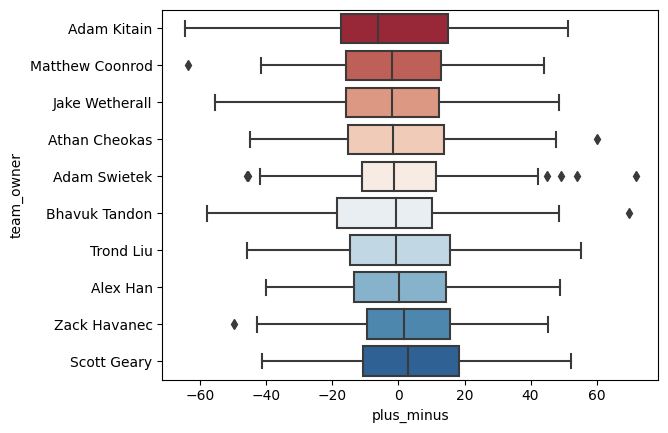

In [45]:
ordr = df.groupby('team_owner')['plus_minus'].median().sort_values().index.tolist()
sns.boxplot(data = df, x = 'plus_minus', y = 'team_owner', order=ordr, palette = 'RdBu')

<AxesSubplot: xlabel='plus_minus', ylabel='Proportion'>

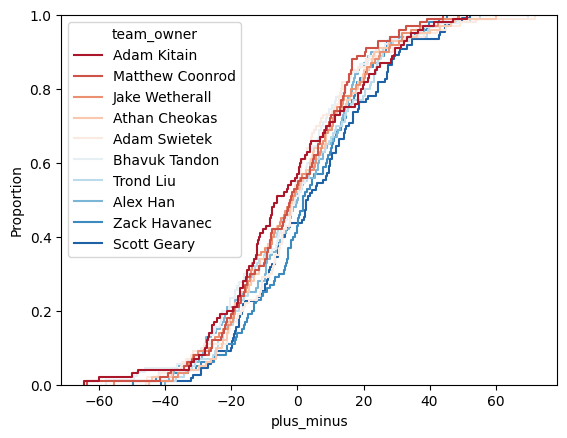

In [48]:
ordr = df.groupby('team_owner')['plus_minus'].median().sort_values().index.tolist()
sns.ecdfplot(data = df, x = 'plus_minus', hue = 'team_owner', hue_order=ordr, palette = 'RdBu')

In [54]:
#wins against 
df.groupby(['team_owner','opp_team_owner'])['win'].sum().unstack()

opp_team_owner,Adam Kitain,Adam Swietek,Alex Han,Athan Cheokas,Bhavuk Tandon,Jake Wetherall,Matthew Coonrod,Scott Geary,Trond Liu,Zack Havanec
team_owner,,,,,,,,,,
Adam Kitain,NaN,7.0,4.0,5.0,5.0,5.0,6.0,6.0,7.0,4.0
Adam Swietek,5.0,NaN,1.0,2.0,7.0,5.0,9.0,5.0,6.0,7.0
Alex Han,6.0,9.0,NaN,7.0,4.0,11.0,4.0,5.0,6.0,3.0
Athan Cheokas,5.0,6.0,5.0,NaN,9.0,8.0,6.0,5.0,6.0,3.0
Bhavuk Tandon,4.0,2.0,3.0,7.0,NaN,5.0,5.0,5.0,2.0,4.0
Jake Wetherall,5.0,5.0,7.0,4.0,4.0,NaN,5.0,6.0,4.0,6.0
Matthew Coonrod,4.0,1.0,6.0,4.0,6.0,5.0,NaN,8.0,6.0,6.0
Scott Geary,5.0,6.0,8.0,6.0,5.0,5.0,11.0,2.0,7.0,6.0
Trond Liu,11.0,4.0,4.0,5.0,6.0,6.0,4.0,3.0,1.0,7.0
